In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from StanfordCars import *
from CarsModelClass import *

%matplotlib inline

def create_ROC_Curves(y, ypred, classes=[1,2,3]):
    fpr = dict()
    tpr = dict()
    auc_value = dict()
    
    # --- Binarize the true and preds
    y_true_bin = label_binarize(y, classes)
    #y_pred_bin = label_binarize(ypred, classes)
    #print(y_true_bin.shape)
    
    labels = {
        1: "ROC Curve for Convertibles",
        2: "ROC Curve for Sedans",
        3: "ROC Curve for SUVs/Trucks/Vans"
    }
    
    # --- Get FPR, TPR & AUC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:,i], ypred[:,i])
        #print(len(fpr[i]))
        auc_value[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=labels[i+1]+" (area = {:.2f})".format(auc_value[i]),
                 linestyle = ":", lw=3)
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.legend(loc="lower right", fontsize=15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Multi-class ROC for Classifying Car Images: One class vs Rest", fontsize = 18)
    plt.show()

Using TensorFlow backend.


In [3]:
cars_model = cars_model_class(no_of_classes=196)   
Xtrn = cars_model.Xtrain
xtst = cars_model.xtest
Ytrn = cars_model.Ytrain
ytst = cars_model.ytest

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn)
xtst_500 = cars_PCA.transform(xtst)
print(np.sum(cars_PCA.explained_variance_ratio_))

logreg = LogisticRegression(C=10, verbose=True, solver="saga", max_iter=1000) # C: Inverse of regularization strength; 
logreg.fit(Xtrn_500, Ytrn)

0.9248511697782725


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 46 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 46 seconds
max_iter reached after 46 seconds
max_iter reached after 47 seconds
max_iter reached after 46 seconds
max_iter reached after 45 seconds
max_iter reached after 45 seconds
max_iter reached after 45 seconds
max_iter reached after 46 seconds
max_iter reached after 47 seconds
max_iter reached after 46 seconds
max_iter reached after 45 seconds
max_iter reached after 44 seconds
max_iter reached after 44 seconds
max_iter reached after 43 seconds
max_iter reached after 42 seconds
max_iter reached after 44 seconds
max_iter reached after 44 seconds
max_iter reached after 43 seconds
max_iter reached after 41 seconds
max_iter reached after 42 seconds
max_iter reached after 41 seconds
max_iter reached after 43 seconds
max_iter reached after 42 seconds
max_iter reached after 43 seconds
max_iter reached after 41 seconds
max_iter reached after 43 seconds
max_iter reached after 41 seconds
max_iter reached after 43 seconds
max_iter reached after 42 seconds
max_iter reach

[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed: 139.5min finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=True,
                   warm_start=False)

In [4]:
ytest_labels = logreg.predict(xtst_500)
ytest_prob = logreg.predict_proba(xtst_500)
train_score = logreg.score(Xtrn_500, Ytrn)
test_score = logreg.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score))
print("Test Score for the Logit Model: {:.3f}".format(test_score))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels))

plt.rcParams['figure.figsize'] = [10, 10]
#create_ROC_Curves(ytst, ytest_prob)

Train Score for the Logit Model: 0.999
Test Score for the Logit Model: 0.427
F1 score for logistic regression: 0.4251113710795773
Confusion matrix: 

 [[18  0  0 ...  0  0  0]
 [ 0  2  1 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0 14]]


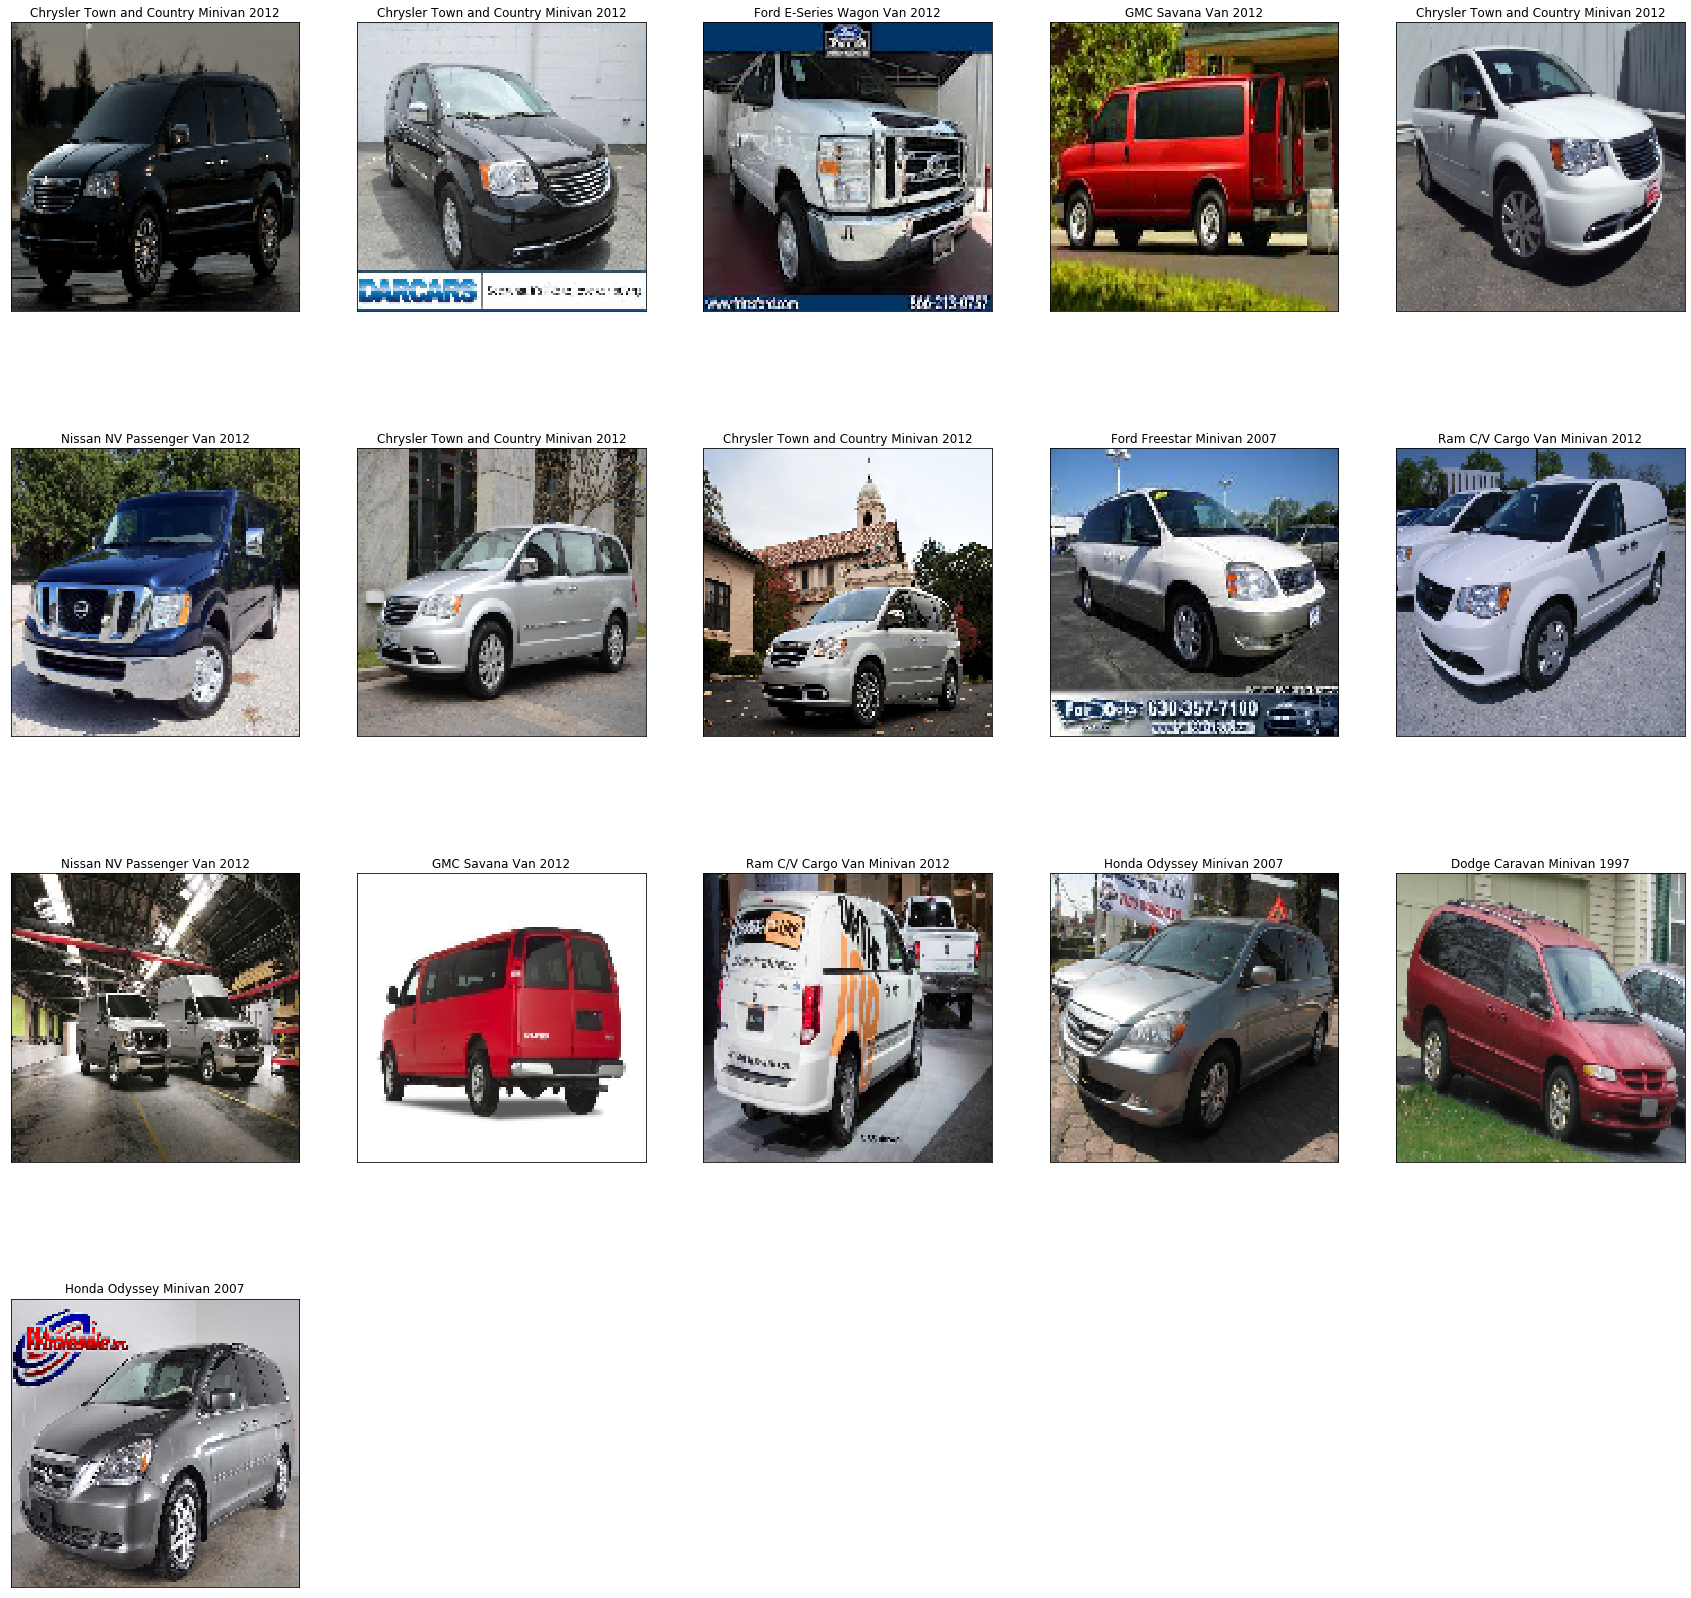

In [25]:
top20_12 = cars_model.get_misclass_topFileNames(ytest_labels, ytest_prob, 5, 3, 30)
GetStandfordCars().show_select_images(top20_12)

In [5]:
dump(logreg, "../Models/MobileNetV2/LogReg_wPCA_Model2_All196Class.joblib")

['../Models/MobileNetV2/LogReg_wPCA_Model2_All196Class.joblib']

In [2]:
cars_model = cars_model_class(no_of_classes=196)   
Xtrn = cars_model.Xtrain
xtst = cars_model.xtest
Ytrn = cars_model.Ytrain
ytst = cars_model.ytest

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn)
xtst_500 = cars_PCA.transform(xtst)
print(np.sum(cars_PCA.explained_variance_ratio_))

logreg2 = LogisticRegression(C=0.01, verbose=True, solver="saga", multi_class="multinomial", max_iter=1000, n_jobs=4) # C: Inverse of regularization strength; 
logreg2.fit(Xtrn_500, Ytrn)

0.9248467658312619


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 321 epochs took 1363 seconds


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed: 22.7min finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=True,
                   warm_start=False)

In [3]:
ytest_labels2 = logreg2.predict(xtst_500)
ytest_prob2 = logreg2.predict_proba(xtst_500)
train_score2 = logreg2.score(Xtrn_500, Ytrn)
test_score2 = logreg2.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score2))
print("Test Score for the Logit Model: {:.3f}".format(test_score2))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels2, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels2))

plt.rcParams['figure.figsize'] = [10, 10]
#create_ROC_Curves(ytst, ytest_prob)

Train Score for the Logit Model: 0.690
Test Score for the Logit Model: 0.439
F1 score for logistic regression: 0.4247618245514741
Confusion matrix: 

 [[19  0  0 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 13]]


In [4]:
dump(logreg2, "../Models/MobileNetV2/LogReg_wPCA_Model2_All196Class_multinomial.joblib")

['../Models/MobileNetV2/LogReg_wPCA_Model2_All196Class_multinomial.joblib']